# Image Classification Using Deep learning

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
    - Airplanes
    - Cars
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications.
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32).
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html
-



### Import Lbraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
tf.__version__

'2.12.0'

# Load Dataset

In [4]:
# from keras.datasets import cifar10
# (X_train, y_train) , (X_test, y_test) = cifar10.load_data()


(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

# Data Visualization

[8]


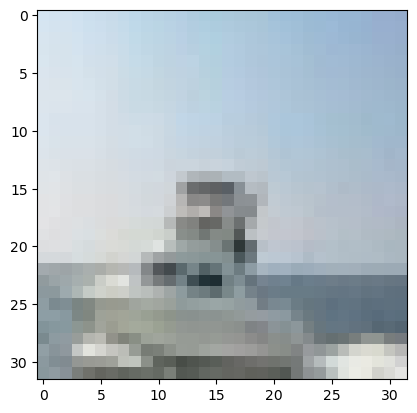

In [9]:
i = 100
plt.imshow(X_train[i])
print(y_train[i])

C:\Users\Subash Chandra\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


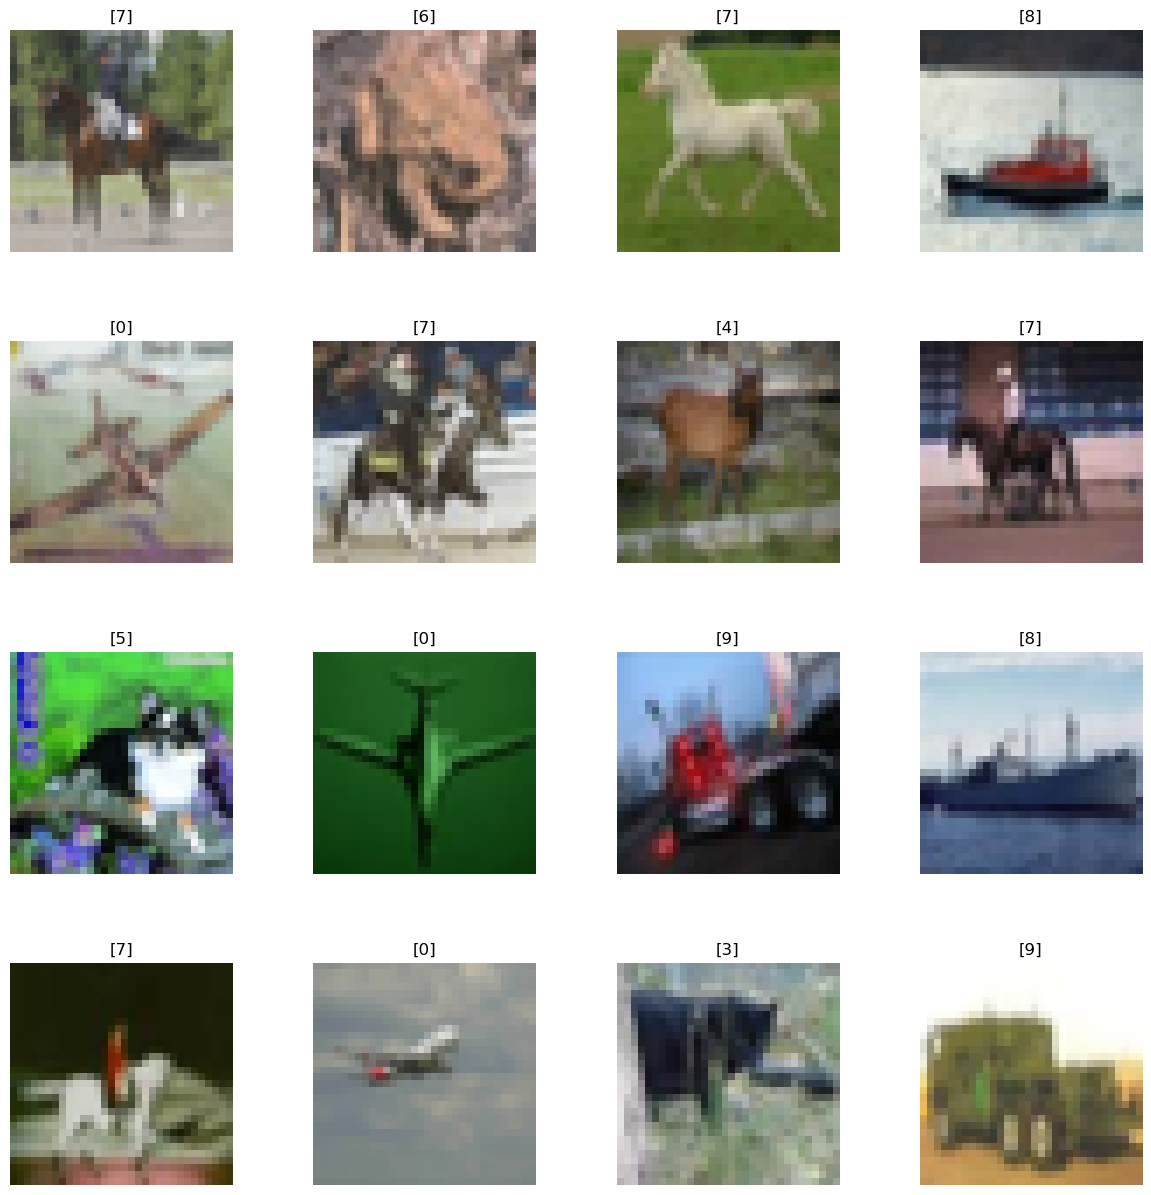

In [10]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [11]:
n_training

50000

# Data Preparation

In [12]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
number_cat = 10

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [19]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [20]:
X_train = X_train/255
X_test = X_test/255


In [21]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
Input_shape = X_train.shape[1:]

In [24]:
Input_shape

(32, 32, 3)

In [25]:
y_train.shape

(50000, 10)

# Train the Model

In [26]:

cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32,32,3)))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))


cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [27]:
cnn.compile(loss='categorical_crossentropy', optimizer='adam')

In [28]:
epochs = 10

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)



Epoch 1/10
98/98 [==============================] - 152s 2s/step - loss: 1.7906
Epoch 2/10
98/98 [==============================] - 149s 2s/step - loss: 1.3726
Epoch 3/10
98/98 [==============================] - 149s 2s/step - loss: 1.2086
Epoch 4/10
98/98 [==============================] - 154s 2s/step - loss: 1.0678
Epoch 5/10
98/98 [==============================] - 153s 2s/step - loss: 0.9885
Epoch 6/10
98/98 [==============================] - 155s 2s/step - loss: 0.8946
Epoch 7/10
98/98 [==============================] - 163s 2s/step - loss: 0.8364
Epoch 8/10
98/98 [==============================] - 164s 2s/step - loss: 0.7778
Epoch 9/10
98/98 [==============================] - 162s 2s/step - loss: 0.7217
Epoch 10/10
98/98 [==============================] - 164s 2s/step - loss: 0.6716


# Evaluate the Model

In [29]:
evaluation = cnn.evaluate(X_test, y_test)
#print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 13s 38ms/step - loss: 0.7218


In [30]:
print('Test Accuracy:', evaluation)


Test Accuracy: 0.7218058705329895


In [31]:
predicted_probabilities = cnn.predict(X_test)
predicted_classes = predicted_probabilities.argmax(axis=1)


313/313 [==============================] - 12s 39ms/step


In [32]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [33]:
y_test = y_test.argmax(1)

In [34]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

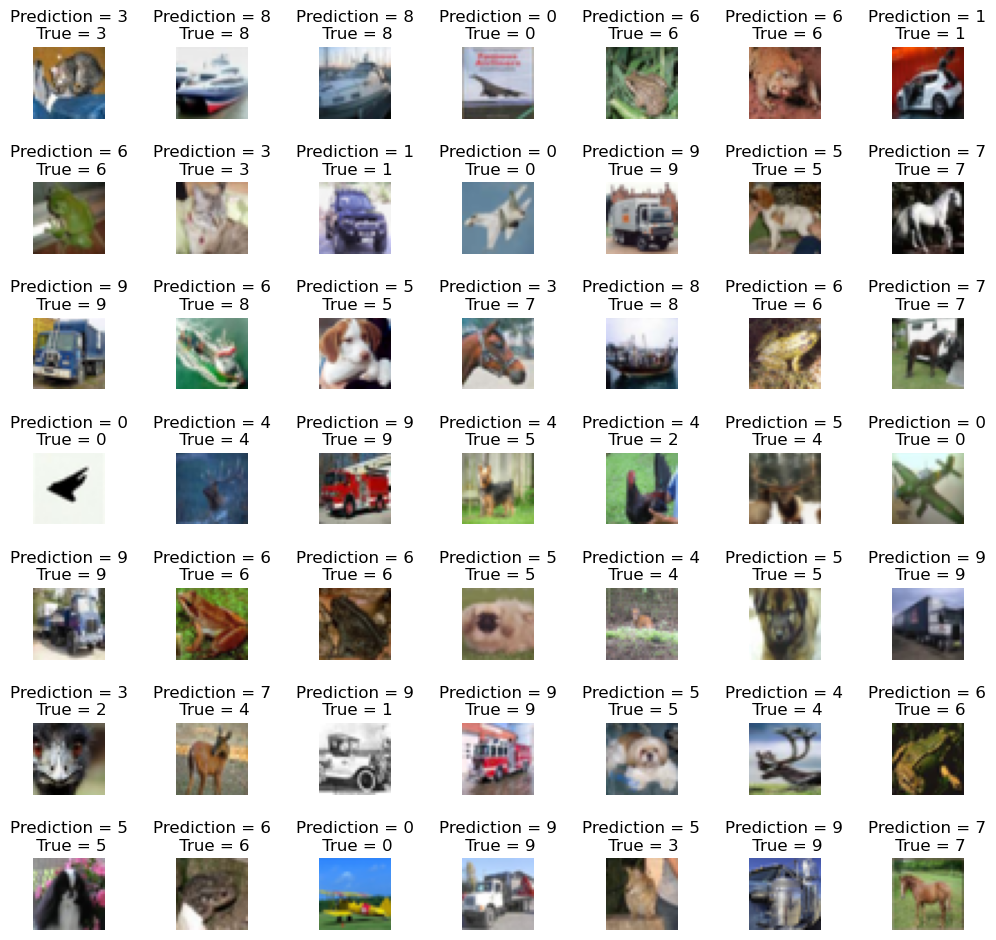

In [35]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

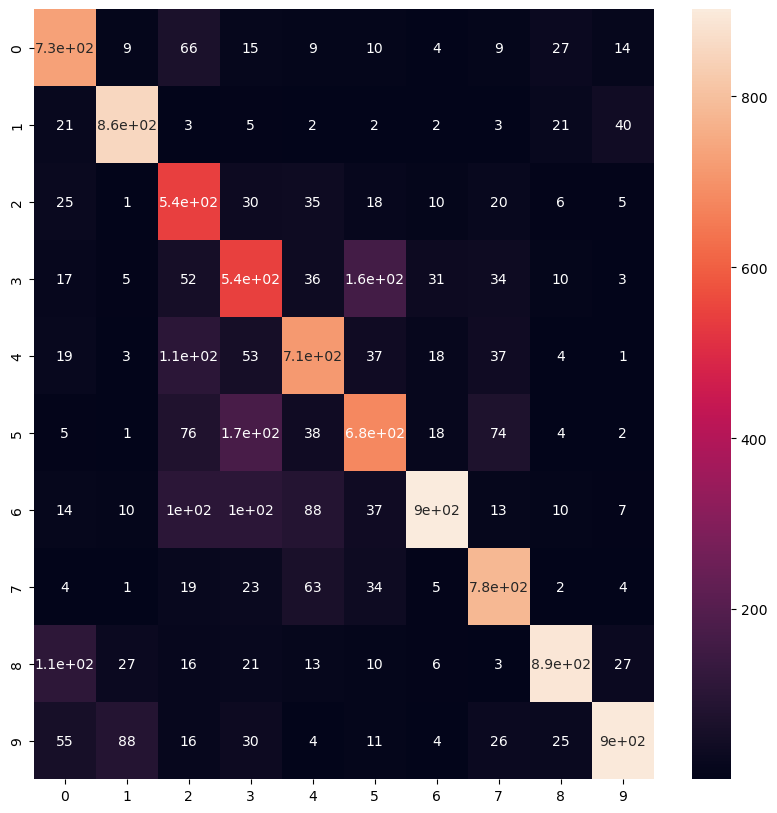

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

## Image Cassification using Machine Learning

In [37]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
from tensorflow import keras

In [39]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

Dataset Acquisition

The dataset used in this replicate is the CIFAR-10 dataset. It is a Keras dataset and thus can be directly downloaded from here with a simple code!It consists of ten classes, namely,airplane, automobile,bird,cat,deer,dog,frog,horse,ship and truck

In [40]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

From shape, it looks that there is a total of 50,000 images for training and 10,000 images for testing. Besides, each of these images is of dimensions 32×32 and colour.

Data Pre-possessing

1. Feature Scaling

Step#1 -- NORMALIZATION: It is achieved by simply dividing x_train by 255.0 for the train dataset and x_test by 255.0 for the test dataset. This is essential to maintain the pixels of all the images within a uniform range.

In [41]:
x_train = x_train/255.0
x_test = x_test/255.0

2. Reshaping

As we will be using the ML algorithms from sklearn, we must reshape the images to a two-dimensional array because sklearn expects a 2D array as input to the fit() function which will be called on the model during training.

In [42]:
nsamples, nx, ny, nrgb = x_train.shape
x_trained = x_train.reshape((nsamples,nx*ny*nrgb))
x_trained.shape

(50000, 3072)

The above code reshapes train set images from (50000,32,32,3) which is a 4D array to (50000,3072), a 2D array. 3072 is obtained by multiplying the dimensions of the image(32x32x3=3072).

In [43]:
nsamples, nx, ny, nrgb = x_test.shape
x_tested = x_test.reshape((nsamples,nx*ny*nrgb))
x_tested.shape

(10000, 3072)

In [44]:
x_trained.shape

(50000, 3072)

In [45]:
x_trained.ndim

2

In [46]:
y_train.ndim

2

In [47]:
y_train.shape

(50000, 1)

Model Training (Applying ML Algorithms)

In [48]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict

Support Vector Machine

In [49]:
import numpy as np

In [ ]:
#y_train=y_train.flatten()

In [ ]:
svc = SVC()
svc.fit(x_trained, np.ravel(y_train))

In [ ]:
y_pred = svc.predict(x_tested)
y_pred

The model returns a number from 0 to 9 as the output. As per the dataset, 0 -9 refers to Airplane, automobile, bird, cat, deer , dog, frog, horse, ship, truck respectively. image.pngimage-2.png

Now, evaluate the model with the test images by obtaining its classification report, and accuracy score.

In [ ]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

Random Forest Classifier

In [50]:
model=RandomForestClassifier()
model.fit(x_trained, np.ravel(y_train))

RandomForestClassifier()

In [51]:
y_pred = model.predict(x_tested)
y_pred

array([2, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [52]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1045
           1       0.54      0.52      0.53      1035
           2       0.32      0.36      0.34       890
           3       0.30      0.36      0.33       822
           4       0.40      0.40      0.40       991
           5       0.39      0.42      0.40       915
           6       0.56      0.46      0.51      1224
           7       0.45      0.52      0.48       881
           8       0.61      0.59      0.60      1031
           9       0.55      0.47      0.51      1166

    accuracy                           0.47     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.48      0.47      0.47     10000



k-Nearest Neighbour Classifier

In [53]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(x_trained, y_train)

C:\Users\Subash Chandra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [54]:
knn_pred = knn.predict(x_tested)
knn_pred

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [55]:
accuracy_score(knn_pred, y_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.53      0.41      0.46      1284
           1       0.20      0.74      0.31       266
           2       0.46      0.23      0.30      2008
           3       0.20      0.29      0.24       685
           4       0.53      0.23      0.32      2253
           5       0.21      0.43      0.29       497
           6       0.27      0.34      0.30       783
           7       0.20      0.70      0.31       286
           8       0.69      0.40      0.50      1749
           9       0.14      0.75      0.24       189

    accuracy                           0.34     10000
   macro avg       0.34      0.45      0.33     10000
weighted avg       0.46      0.34      0.36     10000



Decision Tree Classifier

In [56]:
dct = DecisionTreeClassifier()

In [57]:
dct.fit(x_trained, y_train)

DecisionTreeClassifier()

In [58]:
dct_pred = dct.predict(x_tested)
dct_pred

array([7, 1, 1, ..., 2, 2, 1], dtype=uint8)

In [59]:
accuracy_score(dct_pred, y_test)
print(classification_report(dct_pred, y_test))

              precision    recall  f1-score   support

           0       0.36      0.34      0.35      1072
           1       0.28      0.30      0.29       947
           2       0.22      0.20      0.21      1102
           3       0.19      0.19      0.19       999
           4       0.24      0.23      0.23      1010
           5       0.22      0.22      0.22       965
           6       0.28      0.29      0.28       958
           7       0.27      0.27      0.27      1007
           8       0.38      0.39      0.38       986
           9       0.30      0.32      0.31       954

    accuracy                           0.27     10000
   macro avg       0.27      0.28      0.27     10000
weighted avg       0.27      0.27      0.27     10000



Testing Model Performance against a Custom Input

In [60]:
!pip install opencv-python

In [61]:
import cv2

In [66]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [62]:
img_arr = cv2.imread("Cat.jpeg")
print(img_arr.shape)

(148, 148, 3)


In [63]:

img_arr = cv2.resize(img_arr, (32, 32))

In [64]:
#so,eventually,model.predict() should also be a 2d input
nx, ny, nrgb = img_arr.shape
img_arr2 = img_arr.reshape(1,(nx*ny*nrgb))

In [67]:
ans=dct.predict(img_arr2)
print(classes[ans[0]])

airplane


In [68]:
#img_path2 = 'Aeroplane.jpeg'

In [69]:
img=cv2.imread('Aeroplane.jpeg')
img=cv2.resize(img,(32,32))

In [70]:
nx, ny, nrgb = img.shape
img2 = img.reshape(1,(nx*ny*nrgb))

In [71]:
test=dct.predict(img2)
print(classes[test[0]])

airplane


Classification using CNN

In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             